# Ensemble model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import pandas as pd
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig

from nb_utils import train_eval, forecast
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

In [3]:
with open('../notebooks/train_config-homoEnsemble.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

## Train-eval-plot step by step

In [4]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '5/29/20',
 'train1_end_date': '6/4/20',
 'train1_run_day': '5/28/20',
 'train2_start_date': '6/5/20',
 'train2_end_date': '6/12/20',
 'train2_run_day': '6/4/20',
 'test_start_date': '6/5/20',
 'test_end_date': '6/12/20',
 'test_run_day': '6/4/20'}

In [5]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 10
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

In [6]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/29/20',
 'train_end_date': '6/4/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'}},
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12],
  'beta': [0, 2]},
 'search_parameters': {'max_evals': 10},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable':

In [7]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [8]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [9]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                              
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                       
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
100%|██████████| 10/10 [00:01<00:00,  6.82trial/s, best loss: 58.433044717823456]
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90


In [10]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 42.21134893795268,
    'F_fatalities': 0.07844310685401691,
    'F_hospitalization': 0.05000576272194256,
    'IbyCRatio': 0.1849639678166836,
    'beta': 0.1334882419850132,
    'infectious_period': 1.2237722878476605,
    'r0': 2.6006512172554954}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.004205992630371696,
     'F_fatalities': 0.06974701003843625,
     'F_hospitalization': 0.003047828500110178,
     'IbyCRatio': 1.1507326223527883,
     'beta': 0.6460811747001549,
     'infectious_period': 2.9838565177816525,
     'r0': 1.2154383395024917,
     'LatentEbyCRatio': {'5/28/20': 0.004205992630371696,
      '6/4/20': 0.19364972245765505},
     'LatentIbyCRatio': {'

In [11]:
ensemble_train_config['model_parameters']['constituent_models'] = training_output['model_parameters']['constituent_models']

In [12]:
ensemble_train_config['model_parameters']['constituent_model_losses'] = training_output['model_parameters']['constituent_model_losses']

In [13]:
ensemble_train_config['model_parameters']['modes']['predict_mode'] = 'without_uncertainty'

In [14]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.004205992630371696,
     'F_fatalities': 0.06974701003843625,
     'F_hospitalization': 0.003047828500110178,
     'IbyCRatio': 1.1507326223527883,
     'beta': 0.6460811747001549,
     'infectious_period': 2.9838565177816525,
     'r0': 1.2154383395024917,
     'LatentEbyCRatio': {'5/28/20': 0.004205992630371696,
      '6/4/20': 0.19364972245765505},
     'LatentIbyCRatio': {'5/28/20': 1.1507326223527883,
      '6/4/20': 0.6529172421651144}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 8.35797845774499,
     'F_fatalities': 0.06184733547281428,
     'F_hospitalization': 0.004187901023784926,
     'IbyCRatio': 1.6591340210638463,
     'b

In [15]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       max_evals=10, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                          

t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                     

In [16]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '5/29/20',
 'train1_end_date': '6/4/20',
 'train2_start_date': '6/5/20',
 'train2_end_date': '6/12/20',
 'run_day': '6/4/20',
 'test_start_date': '6/5/20',
 'test_end_date': '6/12/20',
 'data_source': 'tracker_district_daily'}

In [17]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 233.73217887129385,
 'Train1_mape_confirmed': 49.85670505486555,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 143.28915723593414,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 11.260979142000751,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 29.32533743849339,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 199.9434138235544,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 34.39973601021291,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 91.77443035067344,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 4.445825548897981,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 29.334739149059192,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 159.95473105874544,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 34.39973601022071,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 91.77443035063567,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_map

In [18]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.004205992630371696,
     'F_fatalities': 0.06974701003843625,
     'F_hospitalization': 0.003047828500110178,
     'IbyCRatio': 1.1507326223527883,
     'beta': 0.6460811747001549,
     'infectious_period': 2.9838565177816525,
     'r0': 1.2154383395024917,
     'LatentEbyCRatio': {'5/28/20': 0.004205992630371696,
      '6/4/20': 0.19364972245765505},
     'LatentIbyCRatio': {'5/28/20': 1.1507326223527883,
      '6/4/20': 0.6529172421651144}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 8.35797845774499,
     'F_fatalities': 0.06184733547281428,
     'F_hospitalization': 0.004187901023784926,
     'IbyCRati

In [19]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.004205992630371696,
     'F_fatalities': 0.06974701003843625,
     'F_hospitalization': 0.003047828500110178,
     'IbyCRatio': 1.1507326223527883,
     'beta': 0.6460811747001549,
     'infectious_period': 2.9838565177816525,
     'r0': 1.2154383395024917,
     'LatentEbyCRatio': {'5/28/20': 0.004205992630371696,
      '6/4/20': 0.19364972245765505},
     'LatentIbyCRatio': {'5/28/20': 1.1507326223527883,
      '6/4/20': 0.6529172421651144}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 8.35797845774499,
     'F_fatalities': 0.06184733547281428,
     'F_hospitalization': 0.004187901023784926,
     'IbyCRati

In [20]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [21]:
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final
0,6/2/20,78.736788,12.510921,213.876040,16.035653,480.130107,250.218415,250.218415,304.537313,229.911693
1,6/3/20,123.121982,16.551629,222.060794,16.649316,569.742688,331.032577,331.032577,235.534516,238.710110
2,6/4/20,147.358268,19.556973,232.252306,17.413439,640.805197,391.139452,391.139452,191.776311,249.665746
3,6/5/20,159.442546,21.886687,243.961518,18.291354,699.986618,437.733747,437.733747,163.433868,262.252871
4,6/6/20,164.269676,23.763266,256.869107,19.259118,751.393551,475.265326,475.265326,144.484246,276.128225
5,6/7/20,164.701611,25.319948,270.753470,20.300117,797.452556,506.398968,506.398968,131.398907,291.053587
6,6/8/20,162.689563,26.648690,285.459737,21.402740,839.836279,532.973802,532.973802,121.767155,306.862477
7,6/9/20,159.117447,27.795257,300.870967,22.558219,879.334319,555.905133,555.905133,114.488170,323.429186
8,6/10/20,154.803047,28.801254,316.894825,23.759630,916.679543,576.025087,576.025087,108.542843,340.654455
9,6/11/20,150.088649,29.687537,333.458068,25.001482,952.210295,593.750745,593.750745,103.495946,358.459550


t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


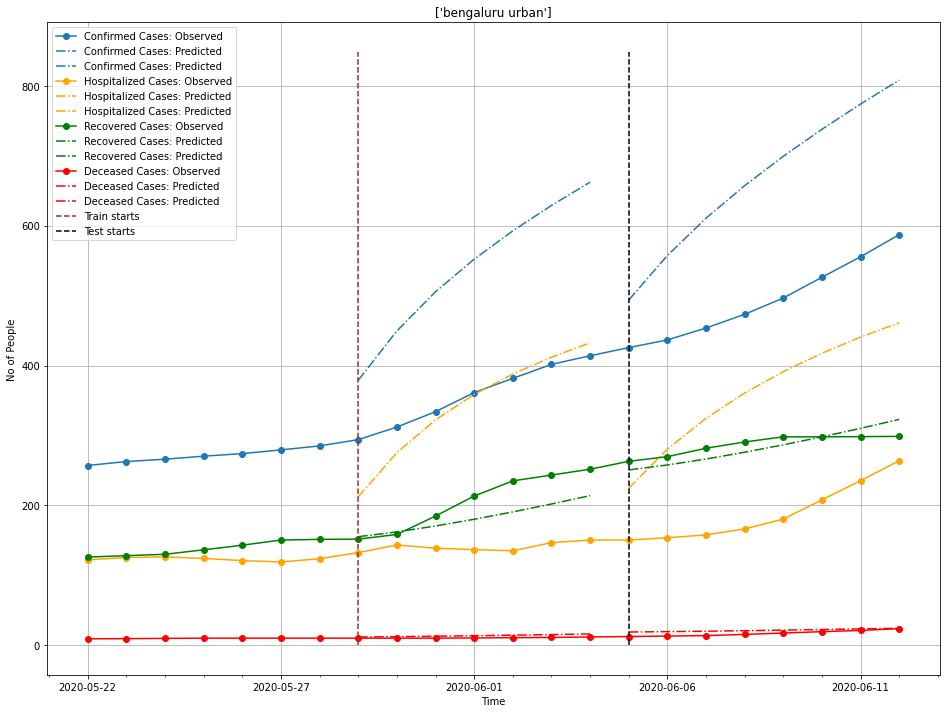

In [22]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


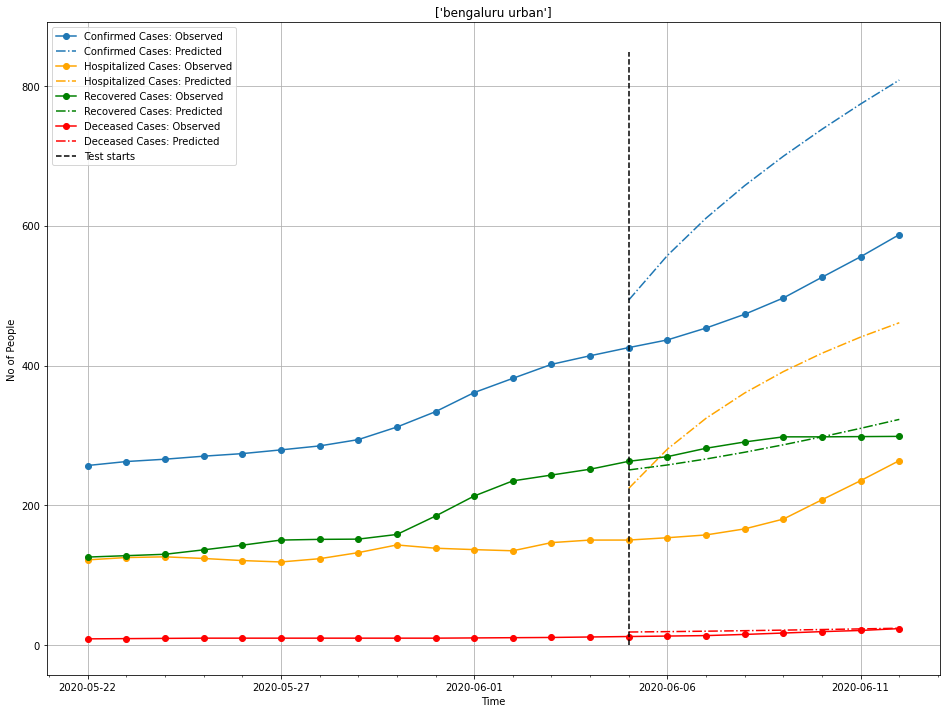

In [23]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


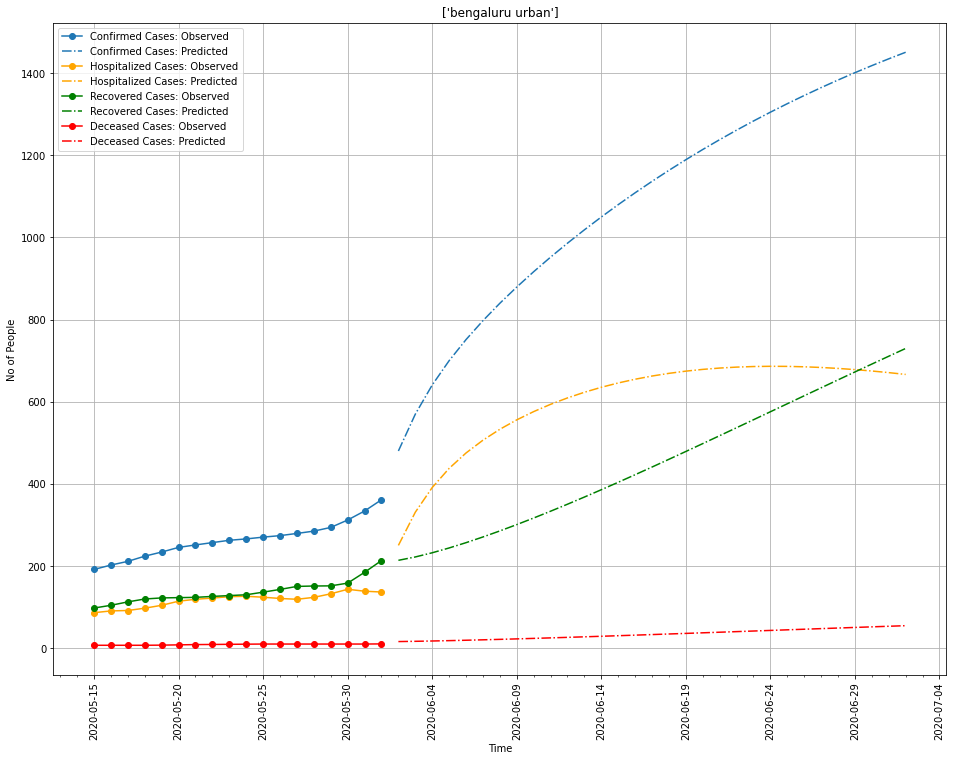

In [24]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, 
        rolling_average = False, uncertainty = False,
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm3.png')

In [25]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.004205992630371696,
     'F_fatalities': 0.06974701003843625,
     'F_hospitalization': 0.003047828500110178,
     'IbyCRatio': 1.1507326223527883,
     'beta': 0.6460811747001549,
     'infectious_period': 2.9838565177816525,
     'r0': 1.2154383395024917,
     'LatentEbyCRatio': {'5/28/20': 0.004205992630371696,
      '6/4/20': 0.19364972245765505},
     'LatentIbyCRatio': {'5/28/20': 1.1507326223527883,
      '6/4/20': 0.6529172421651144}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 8.35797845774499,
     'F_fatalities': 0.06184733547281428,
     'F_hospitalization': 0.004187901023784926,
     'IbyCRati

In [26]:
train2_model_params['model_parameters']['modes']['predict_mode'] = "with_uncertainty"

In [27]:
train2_model_params['model_parameters']['uncertainty_parameters'] = {
            "include_mean": "True",
            "percentiles": [10, 20, 30, 40, 50, 60, 70, 80, 90],
            "ci": 95,
            "date_of_interest": "6/3/20",
            "column_of_interest": "hospitalized",
            "window": 5
        }

In [28]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.004205992630371696,
     'F_fatalities': 0.06974701003843625,
     'F_hospitalization': 0.003047828500110178,
     'IbyCRatio': 1.1507326223527883,
     'beta': 0.6460811747001549,
     'infectious_period': 2.9838565177816525,
     'r0': 1.2154383395024917,
     'LatentEbyCRatio': {'5/28/20': 0.004205992630371696,
      '6/4/20': 0.19364972245765505},
     'LatentIbyCRatio': {'5/28/20': 1.1507326223527883,
      '6/4/20': 0.6529172421651144}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 8.35797845774499,
     'F_fatalities': 0.06184733547281428,
     'F_hospitalization': 0.004187901023784926,
     'IbyCRati

In [29]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


In [30]:
pd.set_option("display.max_columns", None)
uncertainty_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,active_10,hospitalized_10,icu_10,recovered_10,deceased_10,total_10,active_20,hospitalized_20,icu_20,recovered_20,deceased_20,total_20,active_30,hospitalized_30,icu_30,recovered_30,deceased_30,total_30,active_40,hospitalized_40,icu_40,recovered_40,deceased_40,total_40,active_50,hospitalized_50,icu_50,recovered_50,deceased_50,total_50,active_60,hospitalized_60,icu_60,recovered_60,deceased_60,total_60,active_70,hospitalized_70,icu_70,recovered_70,deceased_70,total_70,active_80,hospitalized_80,icu_80,recovered_80,deceased_80,total_80,active_90,hospitalized_90,icu_90,recovered_90,deceased_90,total_90,active_low,hospitalized_low,icu_low,recovered_low,deceased_low,total_low,active_high,hospitalized_high,icu_high,recovered_high,deceased_high,total_high
0,6/2/20,78.736788,12.510921,213.876040,16.035653,480.130107,250.218415,250.218415,304.537313,229.911693,250.218415,250.218415,5.004368,213.876040,16.035653,480.130107,250.218415,250.218415,5.004368,213.876040,16.035653,480.130107,250.218415,250.218415,5.004368,213.876040,16.035653,480.130107,250.218415,250.218415,5.004368,213.876040,16.035653,480.130107,169.051369,169.051369,3.381027,320.815051,15.913438,505.779859,169.051369,169.051369,3.381027,320.815051,15.913438,505.779859,169.051369,169.051369,3.381027,320.815051,15.913438,505.779859,169.051369,169.051369,3.381027,320.815051,15.913438,505.779859,169.051369,169.051369,3.381027,320.815051,15.913438,505.779859,250.218415,250.218415,5.004368,213.876040,16.035653,480.130107,169.051369,169.051369,3.381027,320.815051,15.913438,505.779859
1,6/3/20,123.121982,16.551629,222.060794,16.649316,569.742688,331.032577,331.032577,235.534516,238.710110,331.032577,331.032577,6.620652,222.060794,16.649316,569.742688,331.032577,331.032577,6.620652,222.060794,16.649316,569.742688,331.032577,331.032577,6.620652,222.060794,16.649316,569.742688,331.032577,331.032577,6.620652,222.060794,16.649316,569.742688,298.139186,298.139186,5.962784,483.788127,23.997417,805.924730,298.139186,298.139186,5.962784,483.788127,23.997417,805.924730,298.139186,298.139186,5.962784,483.788127,23.997417,805.924730,298.139186,298.139186,5.962784,483.788127,23.997417,805.924730,298.139186,298.139186,5.962784,483.788127,23.997417,805.924730,331.032577,331.032577,6.620652,222.060794,16.649316,569.742688,298.139186,298.139186,5.962784,483.788127,23.997417,805.924730
2,6/4/20,147.358268,19.556973,232.252306,17.413439,640.805197,391.139452,391.139452,191.776311,249.665746,391.139452,391.139452,7.822789,232.252306,17.413439,640.805197,391.139452,391.139452,7.822789,232.252306,17.413439,640.805197,391.139452,391.139452,7.822789,232.252306,17.413439,640.805197,391.139452,391.139452,7.822789,232.252306,17.413439,640.805197,453.173173,453.173173,9.063463,751.397871,37.271704,1241.842749,453.173173,453.173173,9.063463,751.397871,37.271704,1241.842749,453.173173,453.173173,9.063463,751.397871,37.271704,1241.842749,453.173173,453.173173,9.063463,751.397871,37.271704,1241.842749,453.173173,453.173173,9.063463,751.397871,37.271704,1241.842749,391.139452,391.139452,7.822789,232.252306,17.413439,640.805197,453.173173,453.173173,9.063463,751.397871,37.271704,1241.842749
3,6/5/20,159.442546,21.886687,243.961518,18.291354,699.986618,437.733747,437.733747,163.433868,262.252871,437.733747,437.733747,8.754675,243.961518,18.291354,699.986618,437.733747,437.733747,8.754675,243.961518,18.291354,699.986618,437.733747,437.733747,8.754675,243.961518,18.291354,699.986618,437.733747,437.733747,8.754675,243.961518,18.291354,699.986618,615.246567,615.246567,12.304931,1134.746622,56.287012,1806.280201,615.246567,615.246567,12.304931,1134.746622,56.287012,1806.280201,615.246567,615.246567,12.304931,1134.746622,56.287012,1806.280201,615.246567,615.246567,12.304931,1134.746622,56.287012,1806.280201,615.246567,615.246567,12.304931,1134.746622,56.287012,1806.280201,437.733747,437.733747,8.754